<a href="https://colab.research.google.com/github/MiguelAngel-ht/Image_Processing_/blob/main/Work_7__Spatial_Filtering/Code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORT LIBRARIES
import cv2 as cv                      # https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve    # https://pythonguides.com/scipy-convolve/

In [2]:
# READING IMAGE
img = cv.imread('/content/Fig0316(a).tif', 0)

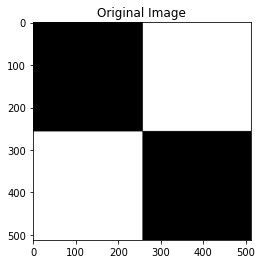

In [3]:
# SHOW ORIGINAL IMAGE
plt.imshow(img, 'gray')
plt.title('Original Image')
plt.show()

In [4]:
# DEFINE FUNCTION OF FILTER OF CONVOLVE WITH DIFERENTS MODES
def Filter(img, kernel, type_):
  
  filters = []
  for i in ['constant', 'reflect', 'mirror', 'wrap']:
    filters.append(convolve(img, kernel, mode = i))
    
  return filters

# FUNCTION THAT PLOT ALL OF IMAGES TOGETHER
def show_images(images, names):

  fig, axs = plt.subplots(1, len(names), figsize=(12, 6), constrained_layout=True)

  for i, (ax, img) in enumerate(zip(axs.flat, images)):
    ax.set_title(names[i])
    ax.imshow(img, 'gray')
    cv.imwrite(names[i]+str(np.random.randint(1,1000))+'.png', img) # save image

  plt.show()

In [5]:
# Average kernel of 31 rows and columns
n = 31
kernel = np.ones((n, n), np.uint8) / (n*n)  

filters = Filter(img, kernel, 'convolve')
titles = ['Constant', 'Reflect', 'Replicate', 'Circular']

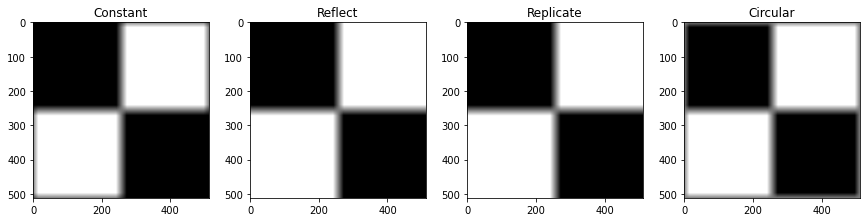

In [6]:
# PLOT CONVOLVE IMAGES
show_images(filters, titles)

In [7]:
# LAPLACIAN KERNEL  
a = 0.4
b = a / 4
c = (1 - a) /  4
kernel = (4 / (a+1)) * np.asarray([[b, c, b],
                                   [c, -1, c],
                                   [b, c, b]])

filters = Filter(img, kernel, 'convolve')

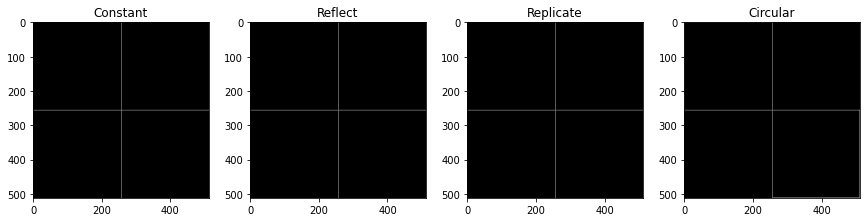

In [8]:
# PLOT LAPLACIAN IMAGES
show_images(filters, titles)

In [9]:
# CREATE KERNEL OF MOTION EFECT WITH SIZE IN PIXELS AND ANGLE IN DEGREES
def kernel_motion_blur(size, angle):
  k = np.zeros((size, size), dtype=np.float32)
  k[ (size-1)// 2 , :] = np.ones(size, dtype=np.float32)
  k = cv.warpAffine(k, cv.getRotationMatrix2D( (size / 2 -0.5 , size / 2 -0.5 ) , angle, 1.0), (size, size) )  
  k = k * ( 1.0 / np.sum(k) )        
  return k

In [10]:
# READING CAMERAMAN IMAGE
img2 = cv.imread('/content/cameraman.tif', 0)

In [11]:
# LOOP THAT SAVE EVERY FILTER
images_motion = []
for i in [0, 90, 30, -30]:
  kernel = kernel_motion_blur(20, i)
  images_motion.append(cv.filter2D(img2, -1, kernel))

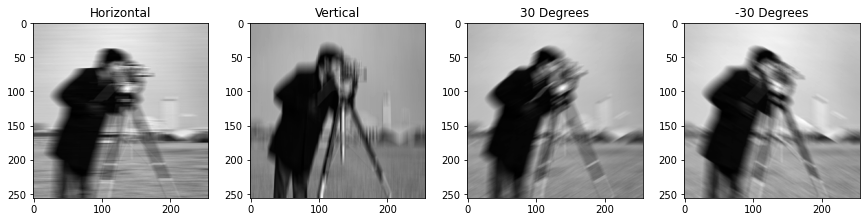

In [12]:
# SHOW MOTION IMAGES WITH TITLES
titles = ['Horizontal', 'Vertical', '30 Degrees', '-30 Degrees']
show_images(images_motion, titles)